In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
climate = pd.read_csv("climate_data.csv")
climate.head(10)

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,ANDAMAN & NICOBAR ISLANDS,1901-2015,Mean,49.2,27.6,30.0,72.2,355.6,471.4,397.5,400.5,431.3,289.5,233.0,153.3,2911.0,76.8,457.8,1700.7,675.8
1,ANDAMAN & NICOBAR ISLANDS,1901-2015,Standard deviation,71.3,38.8,43.6,66.8,151.2,147.0,151.9,142.6,146.7,99.4,119.4,129.5,395.9,81.1,176.8,286.3,199.0
2,ANDAMAN & NICOBAR ISLANDS,1901-2015,Coefficient of variation,144.9,140.4,145.5,92.5,42.5,31.2,38.2,35.6,34.0,34.3,51.2,84.5,13.6,105.6,38.6,16.8,29.4
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
4,ANDAMAN & NICOBAR ISLANDS,1901,Percentage departure,-0.1,215.9,-2.6,-96.8,48.7,9.8,-8.2,20.1,-22.9,34.2,139.5,-78.1,15.9,77.5,22.4,-0.3,45.1
5,ANDAMAN & NICOBAR ISLANDS,1901,No. of districts,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
6,ANDAMAN & NICOBAR ISLANDS,1902,Actual,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
7,ANDAMAN & NICOBAR ISLANDS,1902,Percentage departure,-100.0,479.6,-59.3,-100.0,25.5,13.9,-42.4,88.2,54.5,-31.9,54.1,4.7,20.9,108.1,0.1,28.5,6.1
8,ANDAMAN & NICOBAR ISLANDS,1902,No. of districts,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
9,ANDAMAN & NICOBAR ISLANDS,1903,Actual,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6


In [59]:
yr = climate[climate['YEAR']=='1901-2015']

In [60]:
climate['Parameter'].unique()

array(['Mean', 'Standard deviation', 'Coefficient of variation', 'Actual',
       'Percentage departure', 'No. of districts'], dtype=object)

In [63]:
data = climate[climate['Parameter']=='Actual']
data

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
3,ANDAMAN & NICOBAR ISLANDS,1901,Actual,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
6,ANDAMAN & NICOBAR ISLANDS,1902,Actual,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
9,ANDAMAN & NICOBAR ISLANDS,1903,Actual,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
12,ANDAMAN & NICOBAR ISLANDS,1904,Actual,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
15,ANDAMAN & NICOBAR ISLANDS,1905,Actual,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12441,WEST UTTAR PRADESH,2011,Actual,2.1,10.4,3.9,2.8,29.6,175.9,215.9,232.3,101.7,0.7,0.5,1.5,777.4,12.5,36.3,725.9,2.7
12444,WEST UTTAR PRADESH,2012,Actual,14.5,0.1,1.4,4.7,0.3,4.0,145.1,149.1,67.8,0.5,0.1,2.0,389.6,14.5,6.4,366.0,2.7
12447,WEST UTTAR PRADESH,2013,Actual,20.4,69.5,3.5,1.6,2.1,190.6,233.9,287.1,52.2,61.2,1.7,8.9,932.8,89.9,7.2,763.8,71.8
12450,WEST UTTAR PRADESH,2014,Actual,48.3,29.4,22.6,5.3,11.0,22.0,151.6,81.0,84.7,14.6,0.0,16.3,486.9,77.7,39.0,339.4,30.8


### kerala

In [64]:
ker = data[data.SUBDIVISION=='KERALA']
ker

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
5502,KERALA,1901,Actual,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
5505,KERALA,1902,Actual,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
5508,KERALA,1903,Actual,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
5511,KERALA,1904,Actual,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
5514,KERALA,1905,Actual,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,KERALA,2011,Actual,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5,3035.1,66.2,313.5,2209.1,446.3
5835,KERALA,2012,Actual,7.4,11.0,21.0,171.1,95.3,430.3,362.6,501.6,241.1,187.5,112.9,9.4,2151.1,18.3,287.4,1535.6,309.8
5838,KERALA,2013,Actual,3.9,40.1,49.9,49.3,119.3,1042.7,830.2,369.7,318.6,259.9,154.9,17.0,3255.4,43.9,218.5,2561.2,431.8
5841,KERALA,2014,Actual,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,14.9,364.5,2164.8,502.1


In [65]:
ker.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,12.246957,15.496522,36.814783,110.573913,229.881739,654.302609,700.953043,421.977391,245.619130,294.122609,163.560000,39.950435,2925.487826,27.739130,377.253913,2022.840870,497.636522
std,15.538923,16.206572,30.324601,44.673971,149.271697,187.642791,225.294102,159.693779,122.130976,94.060203,83.882421,37.049051,422.112193,22.361032,151.091850,386.254397,129.860643
min,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000,0.300000,89.900000,1104.300000,166.600000
25%,2.250000,4.700000,18.100000,74.800000,124.350000,539.000000,540.700000,315.550000,152.550000,222.650000,93.150000,10.150000,2627.900000,10.250000,276.750000,1768.850000,407.450000
50%,6.000000,8.400000,28.300000,109.800000,185.400000,633.100000,696.000000,385.200000,223.900000,286.000000,153.800000,31.100000,2937.500000,20.500000,342.000000,1948.700000,501.500000
75%,17.750000,21.400000,50.000000,136.000000,277.250000,791.500000,832.150000,495.300000,333.400000,354.800000,219.800000,53.950000,3164.100000,41.600000,442.300000,2242.900000,584.550000
max,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1199.200000,526.700000,567.900000,365.600000,202.300000,4257.800000,98.100000,915.200000,3451.300000,823.300000


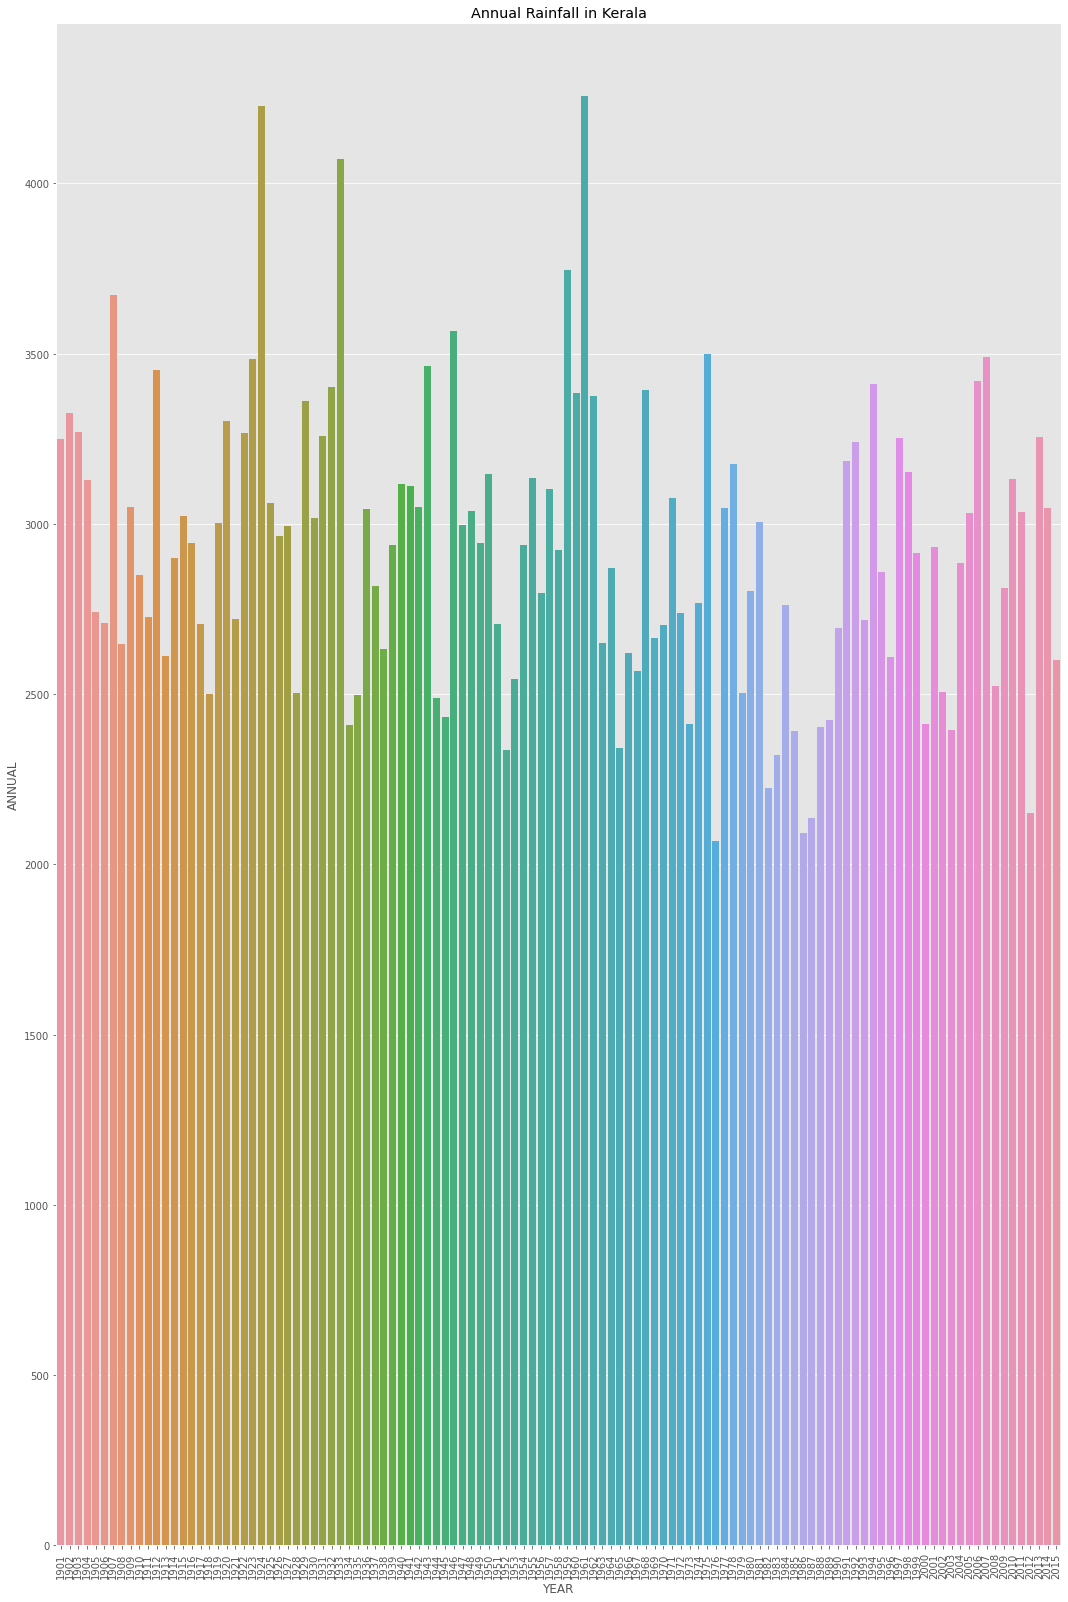

In [72]:
plt.figure(figsize=(18,28))
plt.xticks(rotation=90)
sns.barplot(x='YEAR',y="ANNUAL",data=ker)
plt.title("Annual Rainfall in Kerala")
plt.show()

## maharashtra

In [91]:
mah = data[data.SUBDIVISION=='MADHYA MAHARASHTRA']
mah

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
6543,MADHYA MAHARASHTRA,1901,Actual,18.8,0.6,7.7,36.6,30.4,107.7,215.9,194.1,83.7,68.7,4.4,0.5,769.0,19.4,74.7,601.4,73.5
6546,MADHYA MAHARASHTRA,1902,Actual,7.8,0.0,0.1,5.0,9.8,102.6,210.9,114.5,169.5,60.4,40.5,62.9,784.0,7.8,14.9,597.5,163.8
6549,MADHYA MAHARASHTRA,1903,Actual,7.6,0.0,0.0,3.2,77.2,86.3,281.8,155.5,142.3,74.2,7.6,2.2,837.9,7.6,80.4,665.9,84.1
6552,MADHYA MAHARASHTRA,1904,Actual,0.4,4.7,1.7,3.0,18.7,114.6,126.5,59.5,183.0,91.1,0.0,0.4,603.5,5.1,23.4,483.6,91.4
6555,MADHYA MAHARASHTRA,1905,Actual,0.0,1.2,0.0,2.3,23.6,65.0,252.8,79.0,52.6,52.9,8.3,0.0,537.8,1.2,25.9,449.5,61.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6873,MADHYA MAHARASHTRA,2011,Actual,0.0,0.3,0.3,5.0,2.9,133.3,261.4,238.1,148.4,62.8,0.0,0.0,852.6,0.3,8.2,781.3,62.8
6876,MADHYA MAHARASHTRA,2012,Actual,0.0,0.0,0.0,3.0,1.4,67.9,203.0,187.8,129.5,95.2,2.2,0.0,689.8,0.0,4.4,588.1,97.3
6879,MADHYA MAHARASHTRA,2013,Actual,0.1,5.3,0.8,5.7,6.0,212.4,311.8,147.0,210.3,57.8,4.0,1.3,962.4,5.3,12.4,881.5,63.1
6882,MADHYA MAHARASHTRA,2014,Actual,3.1,6.2,24.4,7.5,29.8,44.0,277.9,240.3,120.4,38.5,32.8,13.1,838.0,9.3,61.7,682.6,84.4


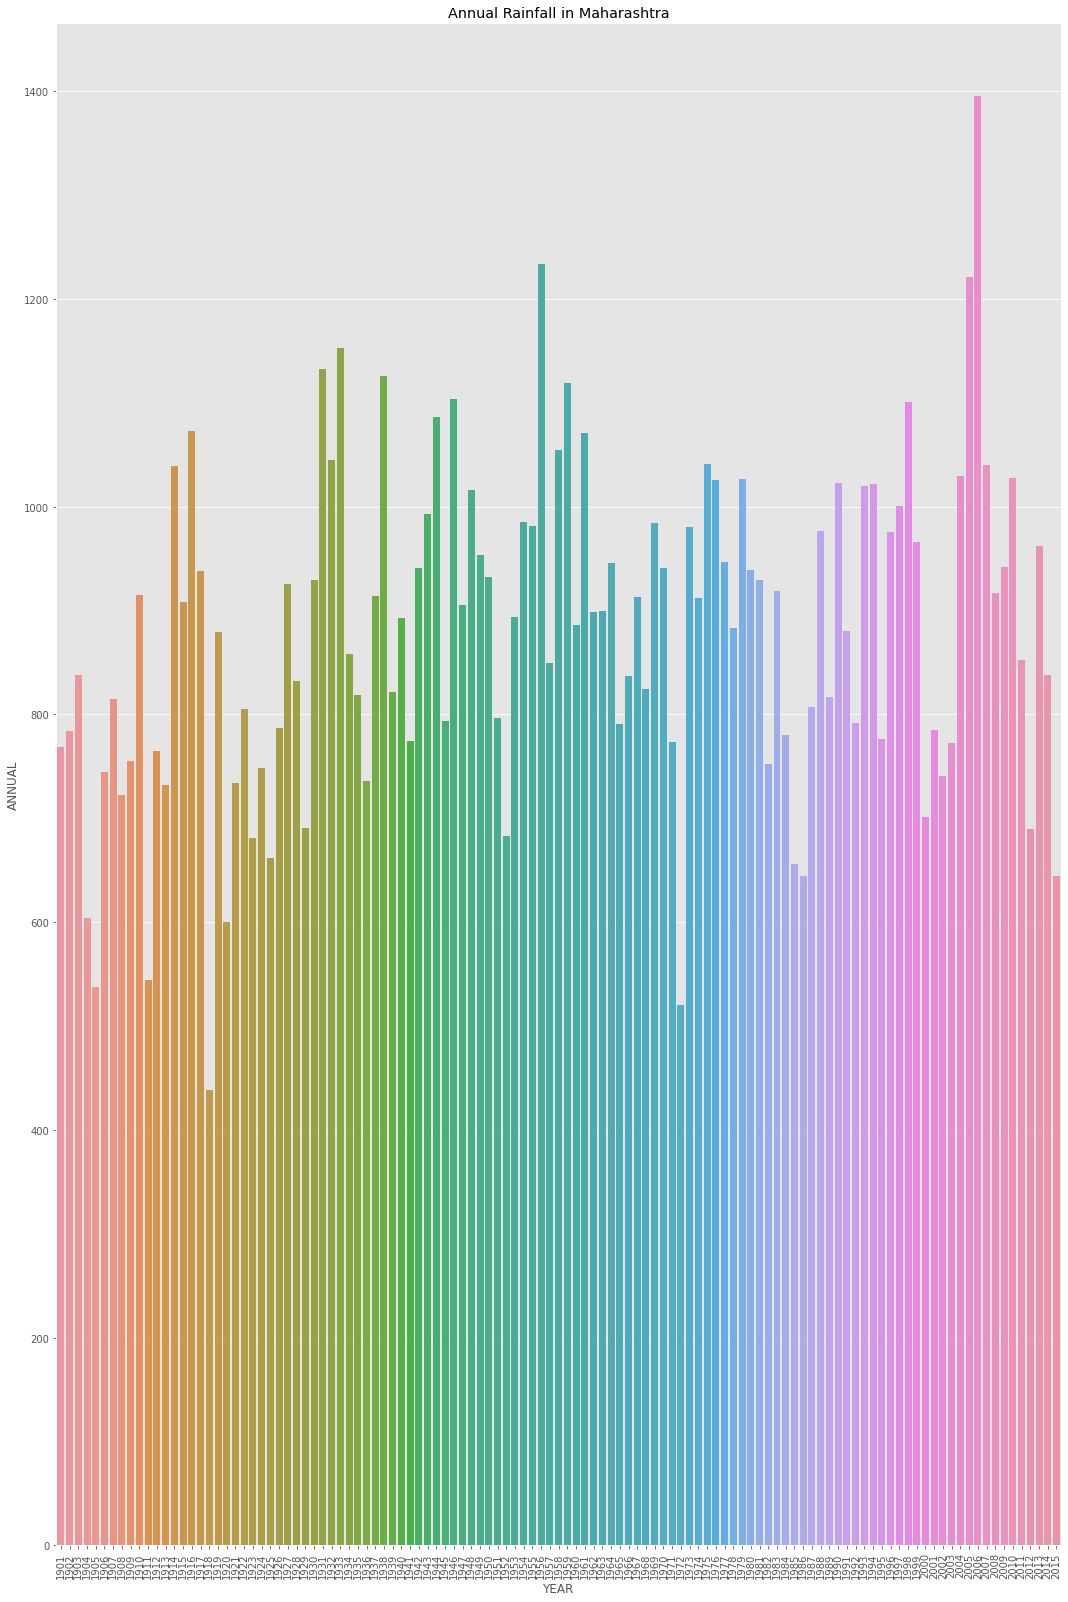

In [101]:
plt.figure(figsize=(18,28))
plt.xticks(rotation=90)
sns.barplot(x='YEAR',y="ANNUAL",data=mah)
plt.title("Annual Rainfall in Maharashtra")
plt.show()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='YEAR'>

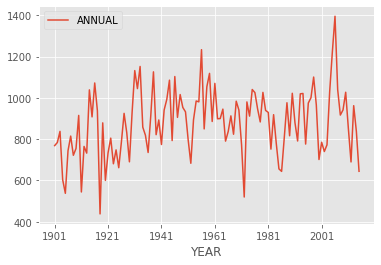

In [99]:
mah.plot(x='YEAR',y='ANNUAL',kind="line")

## punjab

In [103]:
pun = data[data.SUBDIVISION=='PUNJAB']
pun

,SUBDIVISION,YEAR,Parameter,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
8283,PUNJAB,1901,Actual,55.7,50.1,25.2,2.1,25.2,10.4,178.2,145.0,24.4,3.7,0.0,3.3,523.5,105.9,52.5,358.1,7.0
8286,PUNJAB,1902,Actual,0.0,0.8,9.9,10.9,29.6,49.9,125.6,94.9,67.2,9.0,0.0,0.1,398.0,0.8,50.4,337.7,9.1
8289,PUNJAB,1903,Actual,29.5,0.5,45.0,1.3,9.2,5.2,212.2,119.1,132.5,6.9,0.0,9.5,571.0,29.9,55.5,469.1,16.4
8292,PUNJAB,1904,Actual,24.2,1.7,87.8,1.2,13.8,22.0,59.9,124.0,73.8,7.4,9.8,25.9,451.5,25.9,102.9,279.7,43.1
8295,PUNJAB,1905,Actual,53.0,40.3,24.3,0.5,2.2,19.2,122.6,50.3,111.1,1.2,0.0,9.4,434.3,93.3,27.0,303.2,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,PUNJAB,2011,Actual,3.5,35.6,8.2,17.8,18.9,162.9,120.9,193.5,140.2,0.0,1.0,2.6,705.2,39.2,44.9,617.5,3.6
8616,PUNJAB,2012,Actual,62.6,3.2,1.9,31.1,1.6,11.9,120.2,135.1,112.3,2.2,0.4,11.0,493.6,65.8,34.7,379.6,13.6
8619,PUNJAB,2013,Actual,9.3,50.1,11.6,3.4,3.6,120.3,117.9,217.1,24.4,16.2,6.1,6.6,586.6,59.4,18.6,479.7,28.9
8622,PUNJAB,2014,Actual,21.8,20.1,30.3,24.5,20.8,20.6,76.3,41.9,105.8,6.0,0.7,14.1,382.7,41.9,75.5,244.6,20.7


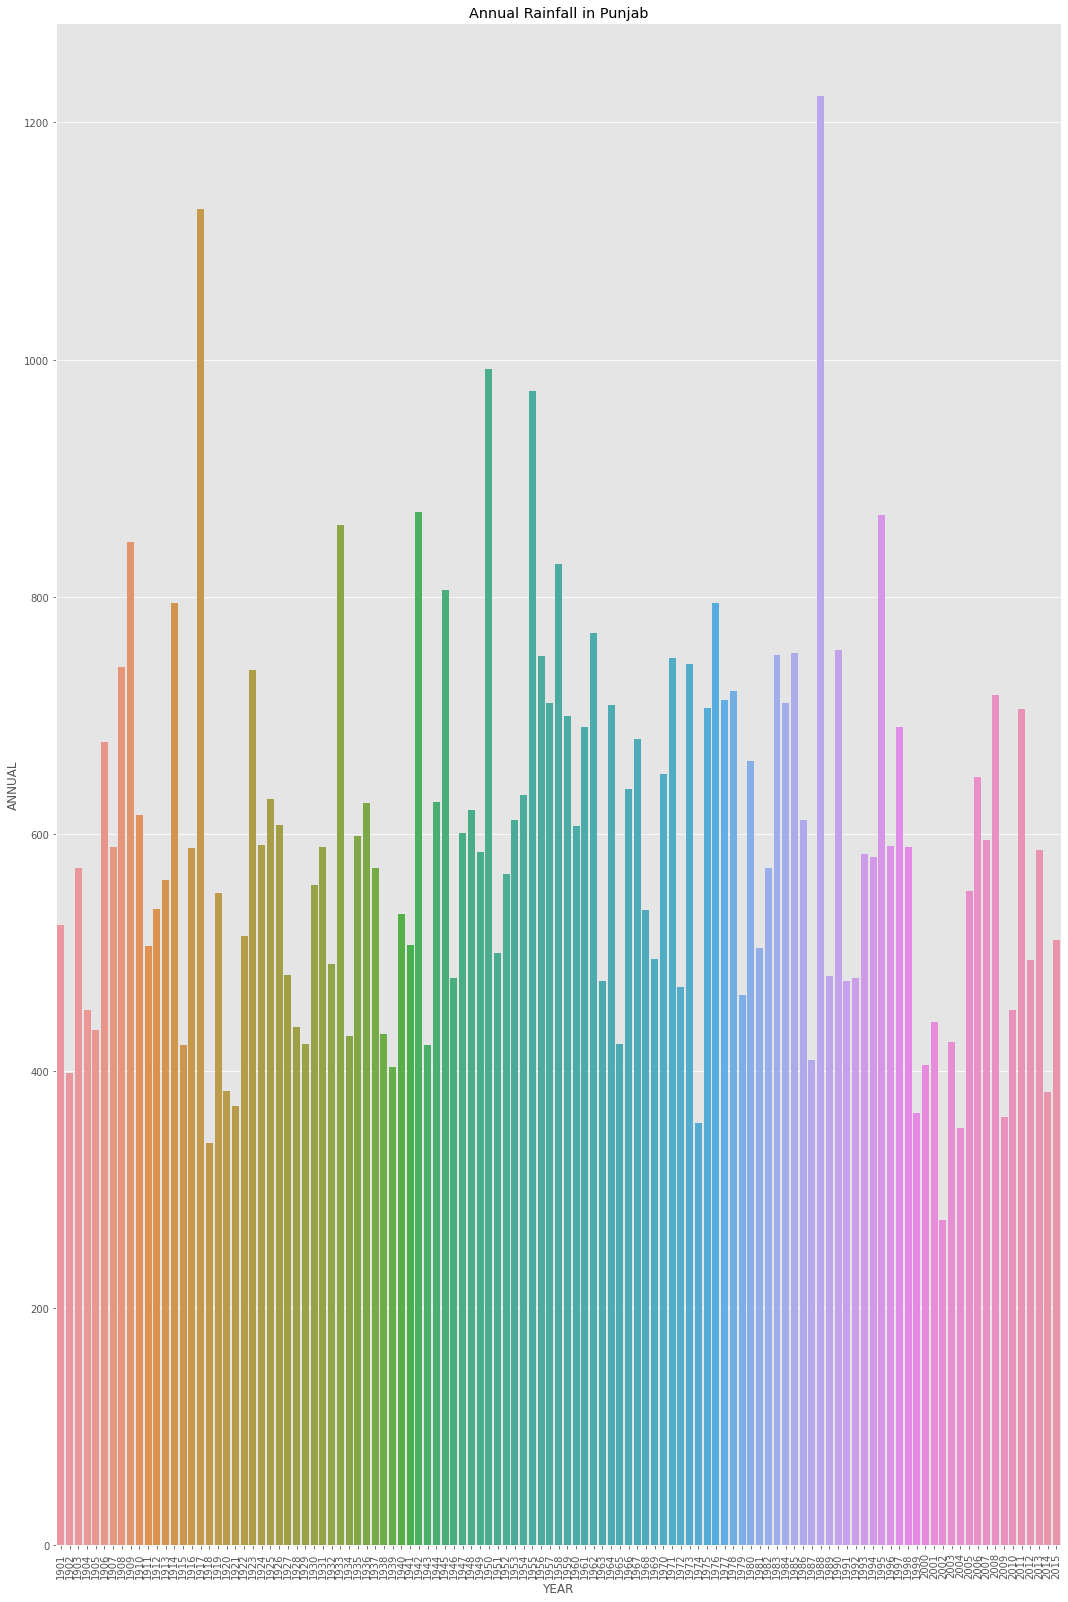

In [104]:
plt.figure(figsize=(18,28))
plt.xticks(rotation=90)
sns.barplot(x='YEAR',y="ANNUAL",data=pun)
plt.title("Annual Rainfall in Punjab")
plt.show()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'rainfall in punjab'}, xlabel='YEAR'>

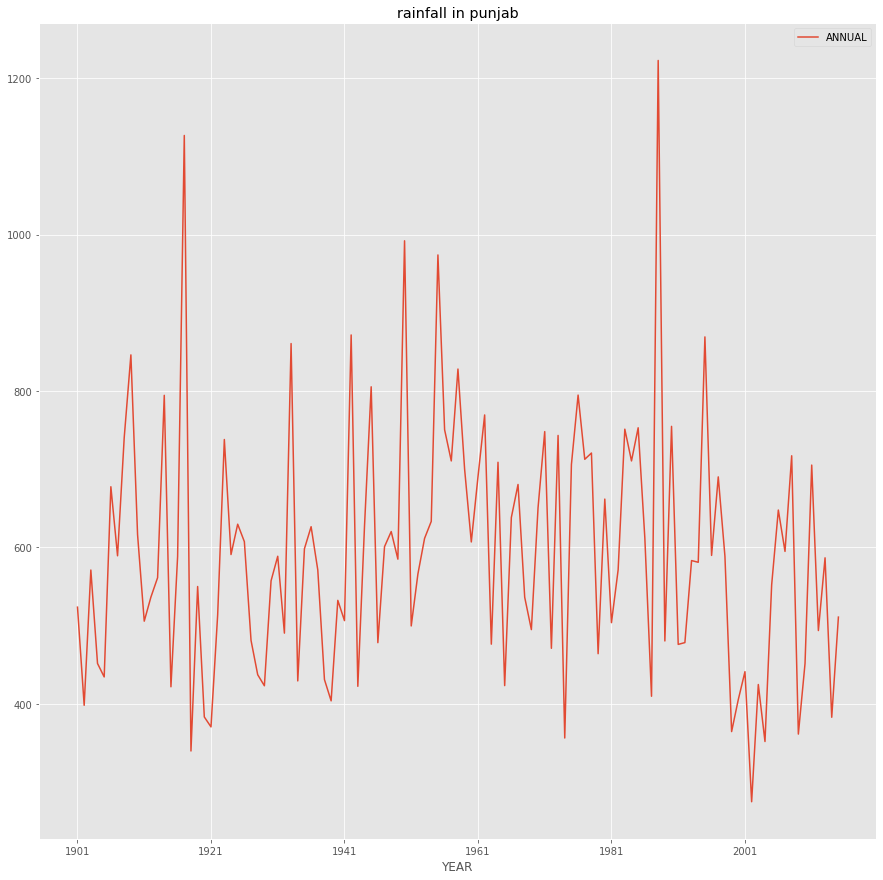

In [107]:
pun.plot(x='YEAR',y='ANNUAL',kind="line",figsize=(15,15),title="rainfall in punjab")